In [31]:
import pandas as pd
from terminology_api import snomed_utils
import seaborn as sns
from matplotlib_venn import venn2
from matplotlib_venn import venn3

#import ast
import numpy as np

# 1. Run SNOMED ECL queries

In [32]:
# Define server URI
SNOMED_SERVER = 'https://browser.ihtsdotools.org/snowstorm/snomed-ct/'

# Define the SNOMED IDs for OPCS and ICD, according to the SNOMED UK edition
REFSET_ID_OPCS = 1126441000000105
REFSET_ID_ICD = 999002271000000101

# List available SNOMED versions
snomed_systems = snomed_utils.get_snomed_editions(SNOMED_SERVER)
[  [s['name'], s['branchPath'], s['shortName']]  for s in snomed_systems['items'] ]

[['International Edition', 'MAIN', 'SNOMEDCT'],
 ['Argentinian Edition', 'MAIN/SNOMEDCT-ES/SNOMEDCT-AR', 'SNOMEDCT-AR'],
 ['Austrian Edition', 'MAIN/SNOMEDCT-AT', 'SNOMEDCT-AT'],
 ['Australian Edition', 'MAIN/SNOMEDCT-AU', 'SNOMEDCT-AU'],
 ['Belgian Edition', 'MAIN/SNOMEDCT-BE', 'SNOMEDCT-BE'],
 ['Canadian Edition', 'MAIN/SNOMEDCT-CA', 'SNOMEDCT-CA'],
 ['Common German Translation', 'MAIN/SNOMEDCT-CDE', 'SNOMEDCT-CDE'],
 ['Common French Translation', 'MAIN/SNOMEDCT-CFR', 'SNOMEDCT-CFR'],
 ['Swiss Edition', 'MAIN/SNOMEDCT-CH', 'SNOMEDCT-CH'],
 ['Germany Edition', 'MAIN/SNOMEDCT-DE', 'SNOMEDCT-DE'],
 ['Danish Edition', 'MAIN/SNOMEDCT-DK', 'SNOMEDCT-DK'],
 ['Estonian Edition', 'MAIN/SNOMEDCT-EE', 'SNOMEDCT-EE'],
 ['Spanish Edition', 'MAIN/SNOMEDCT-ES', 'SNOMEDCT-ES'],
 ['Finnish Edition', 'MAIN/SNOMEDCT-FI', 'SNOMEDCT-FI'],
 ['Genomics', 'MAIN/SNOMEDCT-GEN', 'SNOMEDCT-GEN'],
 ['Irish Edition', 'MAIN/SNOMEDCT-IE', 'SNOMEDCT-IE'],
 ['Netherlands Edition', 'MAIN/SNOMEDCT-NL', 'SNOMEDCT-NL'],


In [33]:
# choose which edition to use
EDITION_PATH = 'MAIN'
EDITION_NAME = 'SNOMEDCT'
OUTPUT_NAME = 'appendix'

# from this edition, get available versions
versions = snomed_utils.get_snomed_edition_versions(SNOMED_SERVER, EDITION_NAME)
[  v['version'] for v in versions['items'] ]

['2002-01-31',
 '2002-07-31',
 '2003-01-31',
 '2003-07-31',
 '2004-01-31',
 '2004-07-31',
 '2005-01-31',
 '2005-07-31',
 '2006-01-31',
 '2006-07-31',
 '2007-01-31',
 '2007-07-31',
 '2008-01-31',
 '2008-07-31',
 '2009-01-31',
 '2009-07-31',
 '2010-01-31',
 '2010-07-31',
 '2011-01-31',
 '2011-07-31',
 '2012-01-31',
 '2012-07-31',
 '2013-01-31',
 '2013-07-31',
 '2014-01-31',
 '2014-07-31',
 '2015-01-31',
 '2015-07-31',
 '2016-01-31',
 '2016-07-31',
 '2017-01-31',
 '2017-07-31',
 '2018-01-31',
 '2018-07-31',
 '2019-01-31',
 '2019-07-31',
 '2020-01-31',
 '2020-03-09',
 '2020-07-31',
 '2021-01-31',
 '2021-07-31',
 '2022-01-31',
 '2022-02-28',
 '2022-03-31',
 '2022-04-30',
 '2022-05-31',
 '2022-06-30',
 '2022-07-31',
 '2022-08-31',
 '2022-09-30',
 '2022-10-31',
 '2022-11-30',
 '2022-12-31',
 '2023-01-31',
 '2023-02-28',
 '2023-03-31',
 '2023-04-30',
 '2023-05-31',
 '2023-06-30',
 '2023-07-31',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01',
 '2024-01-01',
 '2024-02-01']

In [34]:
query_formats = dict()
#405813007 | Procedure site - Direct (attribute) |
query_formats[0] = '(< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << {diagnosis}) ) {suffix}'
query_formats[1] = '(< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << {diagnosis}) ) AND ([1..1] 405813007|Procedure site - Direct| = *))  {suffix}'
query_formats[2] = '(< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << {site})  {suffix}'
query_formats[3] = '(< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << {site}) AND ([1..1] 405813007|Procedure site - Direct| = *))  {suffix}'

In [35]:
query_params = [
    ['appendix', '74400008 | Appendicitis (disorder) |',           '66754008 | Appendix structure (body structure) |', ''],
    ['cataract', '193570009 | Cataract (disorder) |',             '78076003 | Structure of lens of eye (body structure) |', ''],
    ['glaucoma', '23986001 | Glaucoma (disorder) |',              '81745001 | Structure of eye proper (body structure) |', ''],
    ['colorectal', '1286877004 | Malignant neoplasm of cecum and/or colon and/or rectum (disorder) |', '1285733009 | Structure of cecum and/or colon and/or rectum (body structure) |', 'OR << 367336001 | Chemotherapy (procedure) | OR << 1287742003 | Radiotherapy (procedure) |'],
    ['lung', '363358000 | Malignant tumor of lung (disorder) |', '39607008 | Lung structure (body structure) |', '']

    #['divert',   '397881000 | Diverticular disease (disorder) |', '113276009 | Intestinal structure (body structure) |']
]

def compose_query(chosen_query_param, template_id):
    query_template = query_formats[template_id]
    query_template = query_template.format(diagnosis=chosen_query_param[1], site=chosen_query_param[2], suffix=chosen_query_param[3])

    query_name = chosen_query_param[0]+'_'+str(template_id)
    return query_template, query_name




In [36]:
def perform_query(query_text, query_name):

    # Run the query against the SNOMED server
    concepts_retrieved = 0
    total_concepts = 0
    offset = 0
    max_concepts = 5000
    query_results_sets = []
    complete = False
    searchafter = None
    while complete==False:
    # searchafter not offset!!!
        query_results = snomed_utils.run_ecl_query(query_text, max_concepts, SNOMED_SERVER+BRANCH, searchafter)
        # do query
        total_concepts = query_results['total']

        concepts_retrieved = concepts_retrieved + max_concepts
        query_results_sets.append(query_results)

        print('Retrieved '+ str(len( query_results['items'] )) +' concepts')
        if concepts_retrieved >= total_concepts:
            complete=True
        else:
            searchafter = query_results['searchAfter']

    # Shape query into a dataframe and preview
    #query_results_df = pd.DataFrame(query_results['items'])
    query_results_df = pd.concat( [pd.DataFrame(i['items']) for i in query_results_sets] )

    return query_results_df

In [37]:
BRANCH = EDITION_PATH+'/'+'2024-02-01'

# Run query

for p in query_params:
    for f in query_formats.keys():


        query_text, query_name = compose_query(p, f) 
        print('-->',query_name)
        print('   ',query_text)

        OUTPUT_PATH = 'codelists/output/query_'+query_name+'_'

        query_results_df = perform_query(query_text, query_name)

        print('-> Query results')
        print( '  ',len(query_results_df) , 'rows retrieved')

        # Extract the resulting SNOMED IDs and SNOMED terms
        query_result_snomed_ids = [int(i) for i in query_results_df['id']]
        query_result_snomed_terms = [i['term'] for i in query_results_df['fsn']]
        # Create a dictionary to map between the two
        snomed_id_to_term = dict( zip( query_result_snomed_ids, query_result_snomed_terms ) )


        # Output a SNOMED IDs and names to disk
        query_results_output = query_results_df[['conceptId','idAndFsnTerm']]
        snomed_output_path = OUTPUT_PATH+'snomed.csv'

        query_results_output.to_csv(snomed_output_path, index=False)

        print('-> Exported SNOMED codelist to',snomed_output_path)

        snomed_to_opcs(query_result_snomed_ids, OUTPUT_PATH)

--> appendix_0
    (< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << 74400008 | Appendicitis (disorder) |) ) 
Retrieved 282 concepts
-> Query results
   282 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_appendix_0_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
628,1126441000000105,49586007,1,1,H144,H14.4 Appendicocaecostomy,Appendicocecostomy (procedure)
3569,1126441000000105,85472003,1,5,T374,T37.4 Repair of mesentery of small intestine,Mesenteriopexy (procedure)
10269,1126441000000105,250073009,2,3,Y252,Y25.2 Resuture of organ NOC,Suture of broad ligament of uterus (procedure)
13018,1126441000000105,63187005,1,1,Q521,Q52.1 Excision of lesion of broad ligament of ...,Myomectomy of broad ligament (procedure)
17858,1126441000000105,238299003,1,2,T371,T37.1 Excision of lesion of mesentery of small...,Excision of cyst of mesentery (procedure)


-> Exported OPCS codelist to codelists/output/query_appendix_0_opcs.csv
   286 OPCS codes found


,snomed,opcs,opcs_term
628,49586007,H144,H14.4 Appendicocaecostomy
3569,85472003,T374,T37.4 Repair of mesentery of small intestine
10269,250073009,Y252,Y25.2 Resuture of organ NOC
13018,63187005,Q521,Q52.1 Excision of lesion of broad ligament of ...
17858,238299003,T371,T37.1 Excision of lesion of mesentery of small...


--> appendix_1
    (< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << 74400008 | Appendicitis (disorder) |) ) AND ([1..1] 405813007|Procedure site - Direct| = *))  
Retrieved 200 concepts
-> Query results
   200 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_appendix_1_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
3569,1126441000000105,85472003,1,5,T374,T37.4 Repair of mesentery of small intestine,Mesenteriopexy (procedure)
10269,1126441000000105,250073009,2,3,Y252,Y25.2 Resuture of organ NOC,Suture of broad ligament of uterus (procedure)
13018,1126441000000105,63187005,1,1,Q521,Q52.1 Excision of lesion of broad ligament of ...,Myomectomy of broad ligament (procedure)
17858,1126441000000105,238299003,1,2,T371,T37.1 Excision of lesion of mesentery of small...,Excision of cyst of mesentery (procedure)
18585,1126441000000105,73257006,2,1,Y031,Y03.1 Maintenance of prosthesis in organ NOC,Peritoneal dialysis catheter maintenance (proc...


-> Exported OPCS codelist to codelists/output/query_appendix_1_opcs.csv
   212 OPCS codes found


,snomed,opcs,opcs_term
3569,85472003,T374,T37.4 Repair of mesentery of small intestine
10269,250073009,Y252,Y25.2 Resuture of organ NOC
13018,63187005,Q521,Q52.1 Excision of lesion of broad ligament of ...
17858,238299003,T371,T37.1 Excision of lesion of mesentery of small...
18585,73257006,Y031,Y03.1 Maintenance of prosthesis in organ NOC


--> appendix_2
    (< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << 66754008 | Appendix structure (body structure) |)  
Retrieved 24 concepts
-> Query results
   24 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_appendix_2_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
628,1126441000000105,49586007,1,1,H144,H14.4 Appendicocaecostomy,Appendicocecostomy (procedure)
83911,1126441000000105,32578005,2,3,Y205,Y20.5 Percutaneous biopsy NOC,Biopsy of appendix (procedure)
105693,1126441000000105,32578005,2,5,Y203,Y20.3 Biopsy of lesion of organ NOC,Biopsy of appendix (procedure)
233338,1126441000000105,710197007,3,1,Y983,Y98.3 Radiology of three body areas (or 20-40 ...,Ultrasonography of appendix (procedure)
257545,1126441000000105,32578005,1,2,H031,H03.1 Drainage of abscess of appendix,Biopsy of appendix (procedure)


-> Exported OPCS codelist to codelists/output/query_appendix_2_opcs.csv
   50 OPCS codes found


,snomed,opcs,opcs_term
628,49586007,H144,H14.4 Appendicocaecostomy
83911,32578005,Y205,Y20.5 Percutaneous biopsy NOC
105693,32578005,Y203,Y20.3 Biopsy of lesion of organ NOC
233338,710197007,Y983,Y98.3 Radiology of three body areas (or 20-40 ...
257545,32578005,H031,H03.1 Drainage of abscess of appendix


--> appendix_3
    (< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << 66754008 | Appendix structure (body structure) |) AND ([1..1] 405813007|Procedure site - Direct| = *))  
Retrieved 18 concepts
-> Query results
   18 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_appendix_3_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
83911,1126441000000105,32578005,2,3,Y205,Y20.5 Percutaneous biopsy NOC,Biopsy of appendix (procedure)
105693,1126441000000105,32578005,2,5,Y203,Y20.3 Biopsy of lesion of organ NOC,Biopsy of appendix (procedure)
233338,1126441000000105,710197007,3,1,Y983,Y98.3 Radiology of three body areas (or 20-40 ...,Ultrasonography of appendix (procedure)
257545,1126441000000105,32578005,1,2,H031,H03.1 Drainage of abscess of appendix,Biopsy of appendix (procedure)
489781,1126441000000105,174036004,1,3,H012,H01.2 Emergency excision of abnormal appendix NEC,Emergency appendectomy (procedure)


-> Exported OPCS codelist to codelists/output/query_appendix_3_opcs.csv
   44 OPCS codes found


,snomed,opcs,opcs_term
83911,32578005,Y205,Y20.5 Percutaneous biopsy NOC
105693,32578005,Y203,Y20.3 Biopsy of lesion of organ NOC
233338,710197007,Y983,Y98.3 Radiology of three body areas (or 20-40 ...
257545,32578005,H031,H03.1 Drainage of abscess of appendix
489781,174036004,H012,H01.2 Emergency excision of abnormal appendix NEC


--> cataract_0
    (< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << 193570009 | Cataract (disorder) |) ) 
Retrieved 5000 concepts
Retrieved 5000 concepts
Retrieved 5000 concepts
Retrieved 2599 concepts
-> Query results
   17599 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_cataract_0_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
0,1126441000000105,72227005,1,2,Q288,Q28.8 Other specified other open occlusion of ...,Postpartum transection of fallopian tube by va...
19,1126441000000105,788709002,2,1,Y532,Y53.2 Approach to organ under ultrasonic control,Transrectal biopsy of prostate using magnetic ...
22,1126441000000105,14935000,2,8,Z391,Z39.1 Superior vena cava,Ligation of intracranial varicose vein (proced...
68,1126441000000105,15617002,1,8,L843,L84.3 Combined operations on primary long and ...,Ligation of varicose vein of lower limb (proce...
69,1126441000000105,711484009,3,1,Y981,Y98.1 Radiology of one body area (or < 20 minu...,Magnetic resonance imaging of tibia and fibula...


-> Exported OPCS codelist to codelists/output/query_cataract_0_opcs.csv
   6398 OPCS codes found


,snomed,opcs,opcs_term
0,72227005,Q288,Q28.8 Other specified other open occlusion of ...
19,788709002,Y532,Y53.2 Approach to organ under ultrasonic control
22,14935000,Z391,Z39.1 Superior vena cava
68,15617002,L843,L84.3 Combined operations on primary long and ...
69,711484009,Y981,Y98.1 Radiology of one body area (or < 20 minu...


--> cataract_1
    (< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << 193570009 | Cataract (disorder) |) ) AND ([1..1] 405813007|Procedure site - Direct| = *))  
Retrieved 5000 concepts
Retrieved 5000 concepts
Retrieved 3058 concepts
-> Query results
   13058 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_cataract_1_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
0,1126441000000105,72227005,1,2,Q288,Q28.8 Other specified other open occlusion of ...,Postpartum transection of fallopian tube by va...
22,1126441000000105,14935000,2,8,Z391,Z39.1 Superior vena cava,Ligation of intracranial varicose vein (proced...
68,1126441000000105,15617002,1,8,L843,L84.3 Combined operations on primary long and ...,Ligation of varicose vein of lower limb (proce...
171,1126441000000105,429862006,2,2,Y973,Y97.3 Radiology with post contrast,Computed tomography of liver with contrast (pr...
265,1126441000000105,5105000,1,1,M119,M11.9 Unspecified diagnostic endoscopic examin...,Endoscopy of renal pelvis (procedure)


-> Exported OPCS codelist to codelists/output/query_cataract_1_opcs.csv
   5925 OPCS codes found


,snomed,opcs,opcs_term
0,72227005,Q288,Q28.8 Other specified other open occlusion of ...
22,14935000,Z391,Z39.1 Superior vena cava
68,15617002,L843,L84.3 Combined operations on primary long and ...
171,429862006,Y973,Y97.3 Radiology with post contrast
265,5105000,M119,M11.9 Unspecified diagnostic endoscopic examin...


--> cataract_2
    (< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << 78076003 | Structure of lens of eye (body structure) |)  
Retrieved 75 concepts
-> Query results
   75 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_cataract_2_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
6243,1126441000000105,231750006,1,1,C743,C74.3 Mechanical lensectomy,Pars plana lensectomy (procedure)
8406,1126441000000105,231748003,2,2,C738,C73.8 Other specified incision of capsule of lens,Laser capsulotomy of lens capsule (procedure)
14389,1126441000000105,446862000,2,1,C722,C72.2 Suction extraction of lens,One stage intracapsular extraction of lens wit...
16992,1126441000000105,9137006,1,1,C742,C74.2 Discission of cataract,"Discission of membranous cataract, secondary (..."
42672,1126441000000105,231747008,2,3,C731,C73.1 Membranectomy of lens,Surgical capsulotomy of lens capsule (procedure)


-> Exported OPCS codelist to codelists/output/query_cataract_2_opcs.csv
   43 OPCS codes found


,snomed,opcs,opcs_term
6243,231750006,C743,C74.3 Mechanical lensectomy
8406,231748003,C738,C73.8 Other specified incision of capsule of lens
14389,446862000,C722,C72.2 Suction extraction of lens
16992,9137006,C742,C74.2 Discission of cataract
42672,231747008,C731,C73.1 Membranectomy of lens


--> cataract_3
    (< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << 78076003 | Structure of lens of eye (body structure) |) AND ([1..1] 405813007|Procedure site - Direct| = *))  
Retrieved 59 concepts
-> Query results
   59 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_cataract_3_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
8406,1126441000000105,231748003,2,2,C738,C73.8 Other specified incision of capsule of lens,Laser capsulotomy of lens capsule (procedure)
14389,1126441000000105,446862000,2,1,C722,C72.2 Suction extraction of lens,One stage intracapsular extraction of lens wit...
16992,1126441000000105,9137006,1,1,C742,C74.2 Discission of cataract,"Discission of membranous cataract, secondary (..."
42672,1126441000000105,231747008,2,3,C731,C73.1 Membranectomy of lens,Surgical capsulotomy of lens capsule (procedure)
64898,1126441000000105,9137006,1,1,C751,C75.1 Insertion of prosthetic replacement for ...,"Discission of membranous cataract, secondary (..."


-> Exported OPCS codelist to codelists/output/query_cataract_3_opcs.csv
   42 OPCS codes found


,snomed,opcs,opcs_term
8406,231748003,C738,C73.8 Other specified incision of capsule of lens
14389,446862000,C722,C72.2 Suction extraction of lens
16992,9137006,C742,C74.2 Discission of cataract
42672,231747008,C731,C73.1 Membranectomy of lens
64898,9137006,C751,C75.1 Insertion of prosthetic replacement for ...


--> glaucoma_0
    (< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << 23986001 | Glaucoma (disorder) |) ) 
Retrieved 5000 concepts
Retrieved 5000 concepts
Retrieved 2317 concepts
-> Query results
   12317 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_glaucoma_0_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
0,1126441000000105,72227005,1,2,Q288,Q28.8 Other specified other open occlusion of ...,Postpartum transection of fallopian tube by va...
22,1126441000000105,14935000,2,8,Z391,Z39.1 Superior vena cava,Ligation of intracranial varicose vein (proced...
112,1126441000000105,446728007,1,1,G423,G42.3 Fibreoptic endoscopic mucosal resection ...,Endoscopy of upper gastrointestinal tract and ...
171,1126441000000105,429862006,2,2,Y973,Y97.3 Radiology with post contrast,Computed tomography of liver with contrast (pr...
265,1126441000000105,5105000,1,1,M119,M11.9 Unspecified diagnostic endoscopic examin...,Endoscopy of renal pelvis (procedure)


-> Exported OPCS codelist to codelists/output/query_glaucoma_0_opcs.csv
   5121 OPCS codes found


,snomed,opcs,opcs_term
0,72227005,Q288,Q28.8 Other specified other open occlusion of ...
22,14935000,Z391,Z39.1 Superior vena cava
112,446728007,G423,G42.3 Fibreoptic endoscopic mucosal resection ...
171,429862006,Y973,Y97.3 Radiology with post contrast
265,5105000,M119,M11.9 Unspecified diagnostic endoscopic examin...


--> glaucoma_1
    (< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << 23986001 | Glaucoma (disorder) |) ) AND ([1..1] 405813007|Procedure site - Direct| = *))  
Retrieved 5000 concepts
Retrieved 3865 concepts
-> Query results
   8865 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_glaucoma_1_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
0,1126441000000105,72227005,1,2,Q288,Q28.8 Other specified other open occlusion of ...,Postpartum transection of fallopian tube by va...
22,1126441000000105,14935000,2,8,Z391,Z39.1 Superior vena cava,Ligation of intracranial varicose vein (proced...
171,1126441000000105,429862006,2,2,Y973,Y97.3 Radiology with post contrast,Computed tomography of liver with contrast (pr...
265,1126441000000105,5105000,1,1,M119,M11.9 Unspecified diagnostic endoscopic examin...,Endoscopy of renal pelvis (procedure)
266,1126441000000105,5105000,1,18,M119,M11.9 Unspecified diagnostic endoscopic examin...,Endoscopy of renal pelvis (procedure)


-> Exported OPCS codelist to codelists/output/query_glaucoma_1_opcs.csv
   4543 OPCS codes found


,snomed,opcs,opcs_term
0,72227005,Q288,Q28.8 Other specified other open occlusion of ...
22,14935000,Z391,Z39.1 Superior vena cava
171,429862006,Y973,Y97.3 Radiology with post contrast
265,5105000,M119,M11.9 Unspecified diagnostic endoscopic examin...
355,431615005,G156,G15.6 Fibreoptic endoscopic insertion of expan...


--> glaucoma_2
    (< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << 81745001 | Structure of eye proper (body structure) |)  
Retrieved 865 concepts
-> Query results
   865 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_glaucoma_2_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
1364,1126441000000105,25316003,1,9,C456,C45.6 Destruction of lesion of cornea NEC,Destruction of lesion of cornea (procedure)
2119,1126441000000105,426580006,1,9,C799,C79.9 Unspecified operations on vitreous body,Internal tamponade of retina (procedure)
5017,1126441000000105,397112000,1,1,C452,C45.2 Excision of lesion of cornea NEC,Simple excision of pterygium (procedure)
6243,1126441000000105,231750006,1,1,C743,C74.3 Mechanical lensectomy,Pars plana lensectomy (procedure)
8406,1126441000000105,231748003,2,2,C738,C73.8 Other specified incision of capsule of lens,Laser capsulotomy of lens capsule (procedure)


-> Exported OPCS codelist to codelists/output/query_glaucoma_2_opcs.csv
   418 OPCS codes found


,snomed,opcs,opcs_term
1364,25316003,C456,C45.6 Destruction of lesion of cornea NEC
2119,426580006,C799,C79.9 Unspecified operations on vitreous body
5017,397112000,C452,C45.2 Excision of lesion of cornea NEC
6243,231750006,C743,C74.3 Mechanical lensectomy
8406,231748003,C738,C73.8 Other specified incision of capsule of lens


--> glaucoma_3
    (< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << 81745001 | Structure of eye proper (body structure) |) AND ([1..1] 405813007|Procedure site - Direct| = *))  
Retrieved 658 concepts
-> Query results
   658 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_glaucoma_3_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
1364,1126441000000105,25316003,1,9,C456,C45.6 Destruction of lesion of cornea NEC,Destruction of lesion of cornea (procedure)
2119,1126441000000105,426580006,1,9,C799,C79.9 Unspecified operations on vitreous body,Internal tamponade of retina (procedure)
5017,1126441000000105,397112000,1,1,C452,C45.2 Excision of lesion of cornea NEC,Simple excision of pterygium (procedure)
8406,1126441000000105,231748003,2,2,C738,C73.8 Other specified incision of capsule of lens,Laser capsulotomy of lens capsule (procedure)
12125,1126441000000105,450698009,1,30,C832,C83.2 Macular translocation three hundred and ...,Repair of retina (procedure)


-> Exported OPCS codelist to codelists/output/query_glaucoma_3_opcs.csv
   397 OPCS codes found


,snomed,opcs,opcs_term
1364,25316003,C456,C45.6 Destruction of lesion of cornea NEC
2119,426580006,C799,C79.9 Unspecified operations on vitreous body
5017,397112000,C452,C45.2 Excision of lesion of cornea NEC
8406,231748003,C738,C73.8 Other specified incision of capsule of lens
12125,450698009,C832,C83.2 Macular translocation three hundred and ...


--> colorectal_0
    (< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << 1286877004 | Malignant neoplasm of cecum and/or colon and/or rectum (disorder) |) ) OR << 367336001 | Chemotherapy (procedure) | OR << 1287742003 | Radiotherapy (procedure) |
Retrieved 968 concepts
-> Query results
   968 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_colorectal_0_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
554,1126441000000105,172286002,2,4,X654,X65.4 Delivery of a fraction of external beam ...,Radiotherapy to lacrimal gland (procedure)
555,1126441000000105,172286002,2,4,X654,X65.4 Delivery of a fraction of external beam ...,Radiotherapy to lacrimal gland (procedure)
628,1126441000000105,49586007,1,1,H144,H14.4 Appendicocaecostomy,Appendicocecostomy (procedure)
985,1126441000000105,13004001,1,1,H288,H28.8 Other specified diagnostic endoscopic ex...,Rigid proctosigmoidoscopy (procedure)
986,1126441000000105,13004001,1,18,H288,H28.8 Other specified diagnostic endoscopic ex...,Rigid proctosigmoidoscopy (procedure)


-> Exported OPCS codelist to codelists/output/query_colorectal_0_opcs.csv
   750 OPCS codes found


,snomed,opcs,opcs_term
554,172286002,X654,X65.4 Delivery of a fraction of external beam ...
628,49586007,H144,H14.4 Appendicocaecostomy
985,13004001,H288,H28.8 Other specified diagnostic endoscopic ex...
1354,81092009,H337,H33.7 Perineal resection of rectum HFQ
1452,395096001,Y912,Y91.2 Megavoltage treatment for simple radioth...


--> colorectal_1
    (< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << 1286877004 | Malignant neoplasm of cecum and/or colon and/or rectum (disorder) |) ) AND ([1..1] 405813007|Procedure site - Direct| = *))  OR << 367336001 | Chemotherapy (procedure) | OR << 1287742003 | Radiotherapy (procedure) |
Retrieved 674 concepts
-> Query results
   674 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_colorectal_1_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
554,1126441000000105,172286002,2,4,X654,X65.4 Delivery of a fraction of external beam ...,Radiotherapy to lacrimal gland (procedure)
555,1126441000000105,172286002,2,4,X654,X65.4 Delivery of a fraction of external beam ...,Radiotherapy to lacrimal gland (procedure)
985,1126441000000105,13004001,1,1,H288,H28.8 Other specified diagnostic endoscopic ex...,Rigid proctosigmoidoscopy (procedure)
986,1126441000000105,13004001,1,18,H288,H28.8 Other specified diagnostic endoscopic ex...,Rigid proctosigmoidoscopy (procedure)
1452,1126441000000105,395096001,2,2,Y912,Y91.2 Megavoltage treatment for simple radioth...,Stereotactic radiotherapy (procedure)


-> Exported OPCS codelist to codelists/output/query_colorectal_1_opcs.csv
   566 OPCS codes found


,snomed,opcs,opcs_term
554,172286002,X654,X65.4 Delivery of a fraction of external beam ...
985,13004001,H288,H28.8 Other specified diagnostic endoscopic ex...
1452,395096001,Y912,Y91.2 Megavoltage treatment for simple radioth...
3434,73761001,H221,H22.1 Diagnostic fibreoptic endoscopic examina...
7753,446362009,H242,H24.2 Endoscopic coagulation of blood vessel o...


--> colorectal_2
    (< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << 1285733009 | Structure of cecum and/or colon and/or rectum (body structure) |)  OR << 367336001 | Chemotherapy (procedure) | OR << 1287742003 | Radiotherapy (procedure) |
Retrieved 815 concepts
-> Query results
   815 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_colorectal_2_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
554,1126441000000105,172286002,2,4,X654,X65.4 Delivery of a fraction of external beam ...,Radiotherapy to lacrimal gland (procedure)
555,1126441000000105,172286002,2,4,X654,X65.4 Delivery of a fraction of external beam ...,Radiotherapy to lacrimal gland (procedure)
628,1126441000000105,49586007,1,1,H144,H14.4 Appendicocaecostomy,Appendicocecostomy (procedure)
985,1126441000000105,13004001,1,1,H288,H28.8 Other specified diagnostic endoscopic ex...,Rigid proctosigmoidoscopy (procedure)
986,1126441000000105,13004001,1,18,H288,H28.8 Other specified diagnostic endoscopic ex...,Rigid proctosigmoidoscopy (procedure)


-> Exported OPCS codelist to codelists/output/query_colorectal_2_opcs.csv
   661 OPCS codes found


,snomed,opcs,opcs_term
554,172286002,X654,X65.4 Delivery of a fraction of external beam ...
628,49586007,H144,H14.4 Appendicocaecostomy
985,13004001,H288,H28.8 Other specified diagnostic endoscopic ex...
1354,81092009,H337,H33.7 Perineal resection of rectum HFQ
1452,395096001,Y912,Y91.2 Megavoltage treatment for simple radioth...


--> colorectal_3
    (< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << 1285733009 | Structure of cecum and/or colon and/or rectum (body structure) |) AND ([1..1] 405813007|Procedure site - Direct| = *))  OR << 367336001 | Chemotherapy (procedure) | OR << 1287742003 | Radiotherapy (procedure) |
Retrieved 549 concepts
-> Query results
   549 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_colorectal_3_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
554,1126441000000105,172286002,2,4,X654,X65.4 Delivery of a fraction of external beam ...,Radiotherapy to lacrimal gland (procedure)
555,1126441000000105,172286002,2,4,X654,X65.4 Delivery of a fraction of external beam ...,Radiotherapy to lacrimal gland (procedure)
985,1126441000000105,13004001,1,1,H288,H28.8 Other specified diagnostic endoscopic ex...,Rigid proctosigmoidoscopy (procedure)
986,1126441000000105,13004001,1,18,H288,H28.8 Other specified diagnostic endoscopic ex...,Rigid proctosigmoidoscopy (procedure)
1452,1126441000000105,395096001,2,2,Y912,Y91.2 Megavoltage treatment for simple radioth...,Stereotactic radiotherapy (procedure)


-> Exported OPCS codelist to codelists/output/query_colorectal_3_opcs.csv
   478 OPCS codes found


,snomed,opcs,opcs_term
554,172286002,X654,X65.4 Delivery of a fraction of external beam ...
985,13004001,H288,H28.8 Other specified diagnostic endoscopic ex...
1452,395096001,Y912,Y91.2 Megavoltage treatment for simple radioth...
3434,73761001,H221,H22.1 Diagnostic fibreoptic endoscopic examina...
7753,446362009,H242,H24.2 Endoscopic coagulation of blood vessel o...


--> lung_0
    (< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << 363358000 | Malignant tumor of lung (disorder) |) ) 
Retrieved 451 concepts
-> Query results
   451 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_lung_0_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
602,1126441000000105,241226006,1,1,L133,L13.3 Arteriography of pulmonary artery,Pulmonary angiography by main pulmonary artery...
773,1126441000000105,310832007,2,1,Y263,Y26.3 Stapling of organ NOC,Stapling of bronchus (procedure)
3253,1126441000000105,46412002,1,1,E544,E54.4 Excision of segment of lung,Apicectomy lung (procedure)
4048,1126441000000105,175236000,1,7,L079,L07.9 Unspecified creation of shunt to pulmona...,Creation of shunt from subclavian artery to pu...
5803,1126441000000105,233140008,1,1,L065,L06.5 Creation of anastomosis to pulmonary art...,Direct aorta to pulmonary artery anastomosis w...


-> Exported OPCS codelist to codelists/output/query_lung_0_opcs.csv
   359 OPCS codes found


,snomed,opcs,opcs_term
602,241226006,L133,L13.3 Arteriography of pulmonary artery
773,310832007,Y263,Y26.3 Stapling of organ NOC
3253,46412002,E544,E54.4 Excision of segment of lung
4048,175236000,L079,L07.9 Unspecified creation of shunt to pulmona...
5803,233140008,L065,L06.5 Creation of anastomosis to pulmonary art...


--> lung_1
    (< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << (* : R 363698007|Finding site|  = << 363358000 | Malignant tumor of lung (disorder) |) ) AND ([1..1] 405813007|Procedure site - Direct| = *))  
Retrieved 227 concepts
-> Query results
   227 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_lung_1_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
602,1126441000000105,241226006,1,1,L133,L13.3 Arteriography of pulmonary artery,Pulmonary angiography by main pulmonary artery...
773,1126441000000105,310832007,2,1,Y263,Y26.3 Stapling of organ NOC,Stapling of bronchus (procedure)
3253,1126441000000105,46412002,1,1,E544,E54.4 Excision of segment of lung,Apicectomy lung (procedure)
8636,1126441000000105,232646009,3,1,E441,E44.1 Excision of carina,Completion pneumonectomy (procedure)
14649,1126441000000105,232622002,1,8,E473,E47.3 Repair of bronchus NEC,Open procedure to bronchus (procedure)


-> Exported OPCS codelist to codelists/output/query_lung_1_opcs.csv
   207 OPCS codes found


,snomed,opcs,opcs_term
602,241226006,L133,L13.3 Arteriography of pulmonary artery
773,310832007,Y263,Y26.3 Stapling of organ NOC
3253,46412002,E544,E54.4 Excision of segment of lung
8636,232646009,E441,E44.1 Excision of carina
14649,232622002,E473,E47.3 Repair of bronchus NEC


--> lung_2
    (< 71388002|Procedure| : 405813007 | Procedure site - Direct (attribute) | = << 39607008 | Lung structure (body structure) |)  
Retrieved 231 concepts
-> Query results
   231 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_lung_2_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
3253,1126441000000105,46412002,1,1,E544,E54.4 Excision of segment of lung,Apicectomy lung (procedure)
8636,1126441000000105,232646009,3,1,E441,E44.1 Excision of carina,Completion pneumonectomy (procedure)
12697,1126441000000105,432652008,1,2,E495,E49.5 Diagnostic fibreoptic endoscopic examina...,Biopsy of lung using ultrasound guidance (proc...
18593,1126441000000105,169003001,3,3,Y981,Y98.1 Radiology of one body area (or < 20 minu...,Fluoroscopy - lungs (procedure)
19314,1126441000000105,609171001,3,1,Y533,Y53.3 Approach to organ under computed tomogra...,Percutaneous cryoablation of neoplasm of lung ...


-> Exported OPCS codelist to codelists/output/query_lung_2_opcs.csv
   167 OPCS codes found


,snomed,opcs,opcs_term
3253,46412002,E544,E54.4 Excision of segment of lung
8636,232646009,E441,E44.1 Excision of carina
12697,432652008,E495,E49.5 Diagnostic fibreoptic endoscopic examina...
18593,169003001,Y981,Y98.1 Radiology of one body area (or < 20 minu...
19314,609171001,Y533,Y53.3 Approach to organ under computed tomogra...


--> lung_3
    (< 71388002|Procedure| : ( 405813007 | Procedure site - Direct (attribute) | = << 39607008 | Lung structure (body structure) |) AND ([1..1] 405813007|Procedure site - Direct| = *))  
Retrieved 138 concepts
-> Query results
   138 rows retrieved
-> Exported SNOMED codelist to codelists/output/query_lung_3_snomed.csv
-> Retrieved OPCS to SNOMED map


,refsetId,referencedComponentId,mapGroup,mapPriority,mapTarget,opcs_term,referencedComponentTerm
3253,1126441000000105,46412002,1,1,E544,E54.4 Excision of segment of lung,Apicectomy lung (procedure)
8636,1126441000000105,232646009,3,1,E441,E44.1 Excision of carina,Completion pneumonectomy (procedure)
18593,1126441000000105,169003001,3,3,Y981,Y98.1 Radiology of one body area (or < 20 minu...,Fluoroscopy - lungs (procedure)
20622,1126441000000105,442303003,1,2,E578,E57.8 Other specified other open operations on...,Deflation of lung (procedure)
24267,1126441000000105,173178001,1,1,E552,E55.2 Open excision of lesion of lung,Open excision of lesion of lung (procedure)


-> Exported OPCS codelist to codelists/output/query_lung_3_opcs.csv
   116 OPCS codes found


,snomed,opcs,opcs_term
3253,46412002,E544,E54.4 Excision of segment of lung
8636,232646009,E441,E44.1 Excision of carina
18593,169003001,Y981,Y98.1 Radiology of one body area (or < 20 minu...
20622,442303003,E578,E57.8 Other specified other open operations on...
24267,173178001,E552,E55.2 Open excision of lesion of lung


## 2. Map SNOMED codes to OPCS

In [38]:
def snomed_to_opcs(query_result_snomed_ids, OUTPUT_PATH):
    # Load the SNOMED to ICD and OPCS mapping file
    mapping_icd, mapping_opcs = snomed_utils.load_mapping('codelists/mappings/der2_iisssciRefset_ExtendedMapUKCLFull_GB1000000_20220803.txt', REFSET_ID_ICD, REFSET_ID_OPCS)

    # From the mapping file, select only the OPCS codes that map to SNOMED concepts in our query result
    mapping_opcs = mapping_opcs[ mapping_opcs['referencedComponentId'].isin( query_result_snomed_ids ) ]
    # Remove NAs
    mapping_opcs = mapping_opcs[mapping_opcs['mapTarget'].notna()]


    # Add columns with text descriptions
    opcs4_dict = pd.read_csv('codelists/OPCS4_dict.tsv', sep='\t') # Read in OPCS4->text map
    opcs_code_to_text = dict( zip(opcs4_dict['coding'], opcs4_dict['meaning']) )

    mapping_opcs['opcs_term'] = [opcs_code_to_text[i] for i in mapping_opcs['mapTarget']]
    mapping_opcs['referencedComponentTerm'] = [snomed_id_to_term[int(i)] for i in mapping_opcs['referencedComponentId']]

    print('-> Retrieved OPCS to SNOMED map')
    display( mapping_opcs.head() )





    # Export a dataframe of just the OPCS code and its text description
    opcs_codelist_out = pd.DataFrame(data={
        'snomed':mapping_opcs['referencedComponentId'],
        'opcs':mapping_opcs['mapTarget'],
        'opcs_term':mapping_opcs['opcs_term'],
    })
    opcs_codelist_out = opcs_codelist_out.drop_duplicates()

    opcs_output_path = OUTPUT_PATH+'opcs.csv'


    print('-> Exported OPCS codelist to',opcs_output_path)
    print('  ',len( opcs_codelist_out['opcs'].unique() ),'OPCS codes found')
    display(opcs_codelist_out.head())
    #opcs_mappings_out['category'] = [category_dict.get(i) for i in opcs_mappings_out['snomed']]

    opcs_codelist_out.to_csv(opcs_output_path, index=False)


## 2. Map SNOMED codes to ICD9Proc

In [39]:
# Read in ICD9 to SNOMED map (it comes in two files: 1-to-1 and 1-to-many maps)
mapping_icd9_1to1 = pd.read_csv('codelists/mappings/ICD/ICD9CMV3_SNOMED_MAP_1T1_202212.txt', sep='\t')

print('-> Retrieved ICD9 to SNOMED (1-to-1) map')
display(mapping_icd9_1to1.head())

mapping_icd9_1toM = pd.read_csv('codelists/mappings/ICD/ICD9CMV3_SNOMED_MAP_1TM_202212.txt', sep='\t')
mapping_icd9_1toM = mapping_icd9_1toM[ ~ mapping_icd9_1toM['SNOMED_CID'].isna() ] # remove rows where SNOMED ID is missing
mapping_icd9_1toM['SNOMED_CID'] = mapping_icd9_1toM['SNOMED_CID'].astype(int).astype(str) # cast to int then back to str to fix SNOMED IDs with an extra .0

print('-> Retrieved ICD9 to SNOMED (1-to-many) map')
display(mapping_icd9_1toM.head())

# Merge the two maps
mapping_icd9 = pd.concat([mapping_icd9_1to1,mapping_icd9_1toM])

-> Retrieved ICD9 to SNOMED (1-to-1) map


,ICD_CODE,ICD_NAME,IS_CURRENT_ICD,IP_USAGE,SNOMED_CID,SNOMED_FSN
0,99.04,Transfusion of packed cells,1,6.574725,288170000,Packed blood cell transfusion (procedure)
1,39.95,Hemodialysis,1,2.883691,302497006,Hemodialysis (procedure)
2,88.56,Coronary arteriography using two catheters,1,2.391407,49673009,Coronary angiography using two catheters (proc...
3,37.22,Left heart cardiac catheterization,1,2.274478,67629009,Catheterization of left heart (procedure)
4,88.72,Diagnostic ultrasound of heart,1,1.996352,40701008,Echocardiography (procedure)


-> Retrieved ICD9 to SNOMED (1-to-many) map


,ICD_CODE,ICD_NAME,IS_CURRENT_ICD,IP_USAGE,SNOMED_CID,SNOMED_FSN
0,38.93,"Venous catheterization, not elsewhere classified",1,3.818248,392230005,Catheterization of vein (procedure)
2,96.71,Continuous invasive mechanical ventilation for...,1,1.506401,40617009,Artificial respiration (procedure)
3,45.13,Other endoscopy of small intestine,1,1.172203,76009000,Esophagogastroduodenoscopy (procedure)
5,96.72,Continuous invasive mechanical ventilation for...,1,0.963290,40617009,Artificial respiration (procedure)
6,99.07,Transfusion of other serum,1,0.945130,13569004,Transfusion of plasma (procedure)


In [40]:
# Filter to only include concepts in our SNOMED list
mapping_icd9 = mapping_icd9[ mapping_icd9['SNOMED_CID'].isin(query_result_snomed_ids) ]
display( mapping_icd9[['ICD_CODE','ICD_NAME','SNOMED_CID','SNOMED_FSN']].head() )

# output just the SNOMED, ICD and ICD name columns as a map
icd9_codelist_out = pd.DataFrame(data={
    'snomed': mapping_icd9['SNOMED_CID'],
    'icd9': mapping_icd9['ICD_CODE'],
    'icd_term': mapping_icd9['ICD_NAME'],
})
icd9_codelist_out = icd9_codelist_out.drop_duplicates()

#icd9_out['category'] = [category_dict.get(i) for i in icd9_out['snomed']]
icd9_output_path = OUTPUT_PATH+'icd9.csv'
print('-> Exported ICD-9 codelist to',icd9_output_path)
print('  ',len( icd9_codelist_out['icd9'].unique() ),'ICD-9 codes found')
icd9_codelist_out.to_csv(icd9_output_path)

,ICD_CODE,ICD_NAME,SNOMED_CID,SNOMED_FSN
172,92.15,Pulmonary scan,441677009,Imaging of lung (procedure)
313,33.28,Open biopsy of lung,232628003,Open biopsy of lung (procedure)
689,33.43,Closure of laceration of lung,310393006,Suture of lung laceration (procedure)
693,33.10,Incision of lung,45558009,Incision of lung (procedure)
709,33.51,Unilateral lung transplantation,232657004,Single lung transplant (procedure)


-> Exported ICD-9 codelist to codelists/output/query_lung_3_icd9.csv
   7 ICD-9 codes found


In [41]:
query_results_df['conceptId']

0      829831000000100
1            870380006
2            765042000
3            765041007
4            764864002
            ...       
133           20142006
134           14681002
135           12986006
136            3654008
137             435001
Name: conceptId, Length: 138, dtype: object

## Map SNOMED codes to ICD10-PCS

In [42]:
# Read in ICD9 to ICD10 map (it comes in two files: 1-to-1 and 1-to-many maps)
mapping_icd9_to_icd10 = pd.read_csv('codelists/mappings/ICD/icd9toicd10pcsgem.csv')

print('-> Retrieved ICD-9 to ICD-10 map')
print('  ',len( mapping_icd9_to_icd10 ),'rows')

display(mapping_icd9_to_icd10.head())
mapping_icd9_to_icd10 = mapping_icd9_to_icd10[['icd9cm','icd10cm']]
mapping_icd9_to_icd10['icd9cm'] = mapping_icd9_to_icd10['icd9cm'].astype(str)

-> Retrieved ICD-9 to ICD-10 map
   69366 rows


,icd9cm,icd10cm,flags,approximate,no_map,combination,scenario,choice_list
0,1,6A750Z4,10000,1,0,0,0,0
1,1,6A751Z4,10000,1,0,0,0,0
2,2,6A750Z5,10000,1,0,0,0,0
3,2,6A751Z5,10000,1,0,0,0,0
4,3,6A750Z6,10000,1,0,0,0,0


In [43]:
# Only include those ICD9->ICD10 maps where the ICD9 code is in our codelist
icd9_codes = icd9_codelist_out['icd9'].astype(str).str.replace('.','') # convert ICD9 codes to the format used in the 9->10 map (i.e. without a decimal point)
icd10_codelist = mapping_icd9_to_icd10[ mapping_icd9_to_icd10['icd9cm'].isin(icd9_codes) ]

# How many codes in our ICD-9 codelist aren't mapped to an ICD-10 code? (should be 0!)
missing_icd9_icd10_maps = sum( ~ icd9_codes.isin( mapping_icd9_to_icd10['icd9cm'].astype(str) ) )
print('  ',missing_icd9_icd10_maps,'ICD-9 codes with missing maps' )

icd10_codelist = icd10_codelist.drop_duplicates()

#icd10_codes['category'] = [icd9_to_cat.get(str(i)) for i in icd10_codes['icd9cm']]

# Create an ICD9 code to text dictionary
icd10_dict = pd.read_csv('codelists/icd10pcs_dict.txt', delimiter='\t')
icd10_dict['code'] = icd10_dict['concept'].str.split(' ').str[0]
icd10_dict['icd_term'] = icd10_dict['concept'].str.split(' ').str[1]
icd10_code_to_text = dict( zip( icd10_dict['code'].str.strip(), icd10_dict['icd_term'] ) )

# Add a text column to our ICD9->ICD10 dictionary
icd10_codelist['icd_term'] = [icd10_code_to_text.get(str(i)) for i in icd10_codelist['icd10cm']]


icd10_output_path='icd10.csv'
icd10_codelist.to_csv(icd10_output_path)

print('-> Exported ICD-10 codelist to',icd10_output_path)
print('  ',len( icd10_codelist['icd10cm'].unique() ),'ICD-10 codes found')
display( icd10_codelist.head() )


   1 ICD-9 codes with missing maps
-> Exported ICD-10 codelist to icd10.csv
   93 ICD-10 codes found


,icd9cm,icd10cm,icd_term
1532,331,009U30Z,Drainage
1533,331,009U3ZZ,Drainage
1534,331,009U40Z,Drainage
1535,331,009U4ZZ,Drainage
10462,3222,0B5K0ZZ,Destruction


In [44]:
#icd9_out
#icd9_to_cat = dict(zip(icd9_out['icd'].astype(str).str.replace('.',''), icd9_out['category']))

In [45]:
icd10_codelist

,icd9cm,icd10cm,icd_term
1532,331,009U30Z,Drainage
1533,331,009U3ZZ,Drainage
1534,331,009U40Z,Drainage
1535,331,009U4ZZ,Drainage
10462,3222,0B5K0ZZ,Destruction
...,...,...,...
64212,9215,CB12TZZ,Planar
64213,9215,CB12VZZ,Planar
64214,9215,CB1YYZZ,Planar
64215,9215,CB2YYZZ,Tomographic


# Get summary statistics

# Measure OPCS coverage of different queries

## Comparing our OPCS codelist to the CORECT-R list

In [46]:
reference_codelist = pd.read_csv('codelists/CORECT_Dictionary.csv')
reference_codelist = reference_codelist[['OPCS_4CHAR','Mapping1','Mapping2','CorectRMapping']]
reference_codelist['present'] = reference_codelist['OPCS_4CHAR'].isin( opcs_codelist_out['opcs'] )

venn2([
    set( reference_codelist[ ~ reference_codelist['CorectRMapping'].isna() ]['OPCS_4CHAR'] ),
    set( opcs_codelist_out['opcs'] )
    ], 
    ['CORECT-R\ncodelist','Query '+str(q)+'\ncodelist'])

print( reference_codelist.groupby('Mapping1')['present'].mean() )
print( reference_codelist.groupby('CorectRMapping')['present'].mean() )

KeyError: "['OPCS_4CHAR'] not in index"

<Axes: ylabel='Count'>

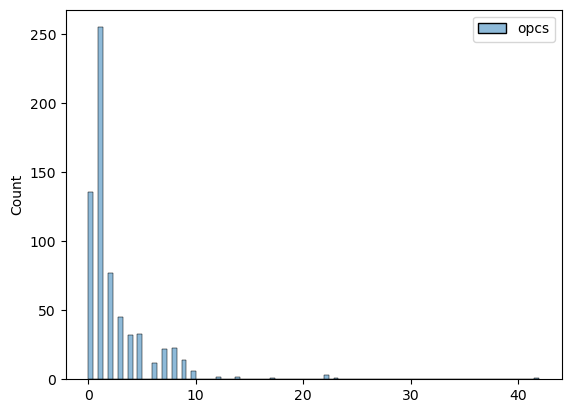

In [ ]:
opcs_codelist_out['snomed'] = opcs_codelist_out['snomed'].astype(str)
snomed_opcs_coverage = query_results_output.merge(opcs_codelist_out, left_on='conceptId', right_on='snomed', how='left')
snomed_opcs_coverage = snomed_opcs_coverage[['conceptId','opcs']]

# For each SNOMED code in the query results, count how many OPCS codes it maps to (should ignore NaNs)
snomed_opcs_coverage.groupby('conceptId').count()

sns.histplot( snomed_opcs_coverage.groupby('conceptId').count() )

/var/folders/jv/r9wkk1k157jgllfhz9lygd0r0000gp/T/ipykernel_55012/3065474195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_results_output['conceptId'] = query_results_output['conceptId'].astype(str)


<Axes: ylabel='Count'>

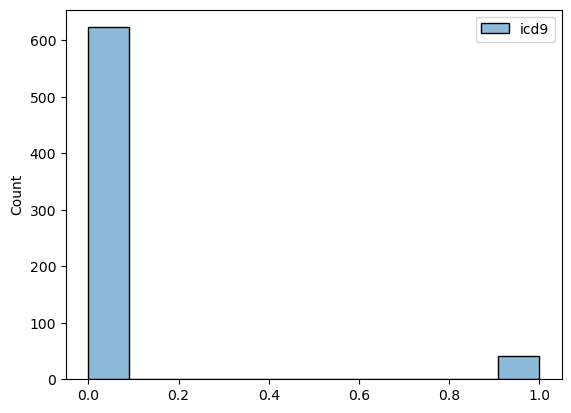

In [ ]:
query_results_output['conceptId'] = query_results_output['conceptId'].astype(str)
icd9_codelist_out['snomed'] = icd9_codelist_out['snomed'].astype(str)

snomed_icd9_coverage = query_results_output.merge(icd9_codelist_out, left_on='conceptId', right_on='snomed', how='left')
snomed_icd9_coverage = snomed_icd9_coverage[['conceptId','icd9']]

sns.histplot( snomed_icd9_coverage.groupby('conceptId').count() )

In [ ]:
icd10_codelist['icd9cm'] = icd10_codelist['icd9cm'].astype(str)
icd9_codelist_out['icd9'] = icd9_codelist_out['icd9'].astype(str).str.replace('.','')

<Axes: ylabel='Count'>

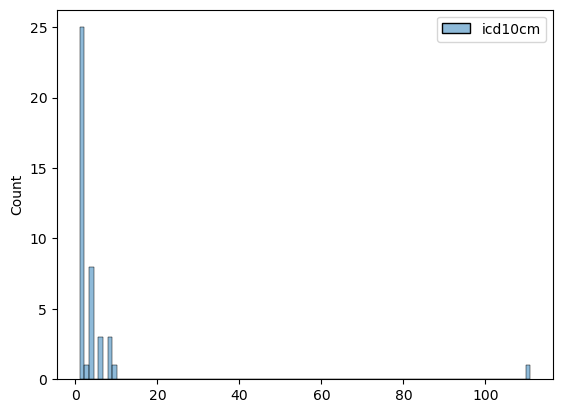

In [ ]:
icd9_icd10_coverage = icd9_codelist_out.merge(icd10_codelist, left_on='icd9', right_on='icd9cm', how='left')
icd9_icd10_coverage = icd9_icd10_coverage[['icd9cm','icd10cm']]

sns.histplot( icd9_icd10_coverage.groupby('icd9cm').count() )

In [ ]:
# queries = ['>>' + i + '. 260686004 | Method (attribute) |' for i in snomed_list_output['idAndFsnTerm']]
# sess_results = snomed_utils.run_ecl_queries(queries, 10000, SNOMED_SERVER+VERSION)

# methods_dict = []
# for r in sess_results:
#     results_df1 = pd.DataFrame(r['items'])
#     try:
#         methods_dict.append( list(results_df1['idAndFsnTerm']) )
#     except:
#         print(' error ')
#         methods_dict.append(None)



# methods_df = pd.DataFrame(data={'concept':snomed_list_output['idAndFsnTerm'],'parents':methods_dict,'category':None})
# #methods_df.to_csv('concept_methods')

# # Get categories

# methods_dict = dict()
# parents_dict = dict()

# for i in snomed_list_output['idAndFsnTerm']:
#     q = '>>' + i + '. 260686004 | Method (attribute) |'
#     snomed_results = snomed_utils.run_ecl_query(q, 10000, SNOMED_SERVER+VERSION)
#     snomed_results_df1 = pd.DataFrame(snomed_results['items'])
#     try:
#         methods_dict[i] = list(snomed_results_df1['idAndFsnTerm'])
#     except:
#         print('methods error '+i)
#         methods_dict[i] = None

#     #q = '>>' + i + '. 116680003 | Is a (attribute) |'
#     #snomed_results = snomed_utils.run_ecl_query(q, 10000, SNOMED_SERVER+VERSION)
#     #snomed_results_df2 = pd.DataFrame(snomed_results['items'])
#     #try:
#     #    parents_dict[i] = list(snomed_results_df2['idAndFsnTerm'])
#     #except:
#     #    print('parents error '+i)

#methods_df = pd.DataFrame(data={'concept':methods_dict.keys(),'parents':methods_dict.values(),'category':None})
#display( methods_df.head() )

#parents_df = pd.DataFrame(data={'concept':parents_dict.keys(),'parents':parents_dict.values(),'category':None})
#display( parents_df.head() )
#parents_df.to_csv('concept_parents')

parents_df = pd.read_csv('concept_parents')
parents_df['parents'] = [ ast.literal_eval(i) for i in parents_df['parents'] ]

methods_df = pd.read_csv('concept_methods')
methods_df['parents'] = methods_df['parents'].replace(np.nan, '[]')
methods_df['parents'] = [ ast.literal_eval(i) for i in methods_df['parents'] ]

methods_and_parents = pd.DataFrame(data={'concept':parents_df['concept'],'parents':parents_df['parents'],'methods':methods_df['parents'],'category':None})
methods_and_parents


#methods_and_parents.loc[ [('360037004 | Imaging - action (qualifier value) |'  in l) if l is not None else False for l in methods_and_parents["methods"]  ] , "category"] = 'imaging'
#parents_df.loc[ ['43075005 | Partial resection of colon (procedure) |'  in l for l in parents_df["parents"] ], "category"] = 'minor resection'
#parents_df.loc[ ['23968004 | Excision of colon (procedure) |'  in l for l in parents_df["parents"] ], "category"] = 'major resection'
#parents_df.loc[ ['108193009 | Abdomen destructive procedure (procedure) |'  in l for l in parents_df["parents"] ], "category"] = 'minor resection'
#parents_df.loc[ ['108193009 | Abdomen destructive procedure (procedure) |'  in l for l in parents_df["parents"] ], "category"] = 'minor resection'

#methods_and_parents.loc[ ['82874003 | Operation on colon (procedure) |'  in l for l in parents_df["methods_and_parents"] ], "category"] = 'surgery'
#methods_and_parents.loc[ ['86273004 | Biopsy (procedure) |'  in l for l in parents_df["methods_and_parents"] ], "category"] = 'testing'

for index,row in methods_and_parents.iterrows():
    # if (row['methods'] is not None) and ('360037004 | Imaging - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'imaging'


    if (row['methods'] is not None) and ('129433002 | Inspection - action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Diagnostic test'
    if (row['methods'] is not None) and ('129314006 | Biopsy - action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Diagnostic test'
    if (row['methods'] is not None) and ('129314006 | Biopsy - action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Diagnostic test'


    # if (row['methods'] is not None) and ('129427006 | Reduction - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'surgery'
    # if (row['methods'] is not None) and ('129382001 | Destruction - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'surgery'
    # if (row['methods'] is not None) and ('257903006 | Repair - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'surgery'

    # if (row['methods'] is not None) and ('129304002 | Excision - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'surgery' # Resection

    # if (row['methods'] is not None) and ('360021005 | Bypass - action (qualifier value) |' in row['methods']):
    #     methods_and_parents.iloc[index]['category'] = 'Bypass'

    # if (row['concept'] == '1260482004 | Insertion of stent into colon using colonoscope (procedure) |'):
    #     methods_and_parents.iloc[index]['category'] = 'Stent'

    if (row['methods'] is not None) and ('129284003 | Surgical action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Surgery other'

    if (row['methods'] is not None) and ('360037004 | Imaging - action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Imaging'

    if (row['methods'] is not None) and re.search('stoma',row['concept'], re.IGNORECASE) :
        methods_and_parents.iloc[index]['category'] = 'Stoma'

    if (row['methods'] is not None) and re.search('exteriorization',row['concept'], re.IGNORECASE) :
        methods_and_parents.iloc[index]['category'] = 'Stoma'


    if (row['methods'] is not None) and any( [re.search('resection',i, re.IGNORECASE) for i in row['parents']] ):
        methods_and_parents.iloc[index]['category'] = 'Resection'
    if (row['methods'] is not None) and re.search('colectomy',row['concept'], re.IGNORECASE) :
        methods_and_parents.iloc[index]['category'] = 'Resection'

    if (row['methods'] is not None) and ('360021005 | Bypass - action (qualifier value) |' in row['methods']):
        methods_and_parents.iloc[index]['category'] = 'Bypass'


        

    if (row['methods'] is not None) and re.search('stent',row['concept'], re.IGNORECASE) :
        methods_and_parents.iloc[index]['category'] = 'Stent'



#methods_df = pd.DataFrame(data={'concept':sess_results.keys(),'parents':sess_results.values(),'category':None})
#methods_df.to_csv('concept_methods')
        
category_dict = dict(zip([int(i[0]) for i in methods_and_parents['concept'].str.split(' ',1)], methods_and_parents['category']))
category_dict

#methods_df.loc[ ['360037004 | Imaging - action (qualifier value) |'  in l for l in parents_df["parents"] ], "category"] = 'imaging'
####methods_df.loc[ ['129304002 | Excision - action (qualifier value) |'  in l for l in parents_df["parents"] ], "category"] = 'excision'
#methods_df.loc[ ['129314006 | Biopsy - action (qualifier value) |'  in l for l in parents_df["parents"] ], "category"] = 'biopsy'
#methods_df.loc[ ['360021005 | Bypass - action (qualifier value) |'  in l for l in parents_df["parents"] ], "category"] = 'bypass'



display( methods_and_parents )
print( sum(methods_and_parents.category.isna()) )
print( sum(methods_and_parents.category.isna()) / len(methods_and_parents) * 100 )


FileNotFoundError: [Errno 2] No such file or directory: 'concept_parents'